Uses the files trainLoss.csv and testLoss.csv generated during the training phase by runner script.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plot_title = "RNN-Gom-LM-"


## Training Loss

In [ ]:
def plot_array(array, vpoints=None, x_label='', y_label='', title='',lcolor='b', 
               figsize=None, plot_from_x_index=0, x_scale_factor=1, sparsity =1, 
               y_lim=None, x_lim=None ):
    if figsize:
#         print(plt.rcParams.get('figure.figsize')) # Actual values
        plt.figure(figsize=figsize)
    if y_lim:
        plt.gca().set_ylim(y_lim)
    if x_lim:
        plt.gca().set_xlim(right = x_lim)
    x = np.arange(len(array))*x_scale_factor
    x_pval = x[plot_from_x_index::sparsity]
    y_pval = array[plot_from_x_index::sparsity]
    plt.plot(x_pval, y_pval, lcolor)
    
    ## Vertical lines
    if vpoints is not None:
        plt.vlines(vpoints,ymin=0,ymax=max(y_pval) ,colors='y', linestyles='dotted')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

Epochs Recorded 40


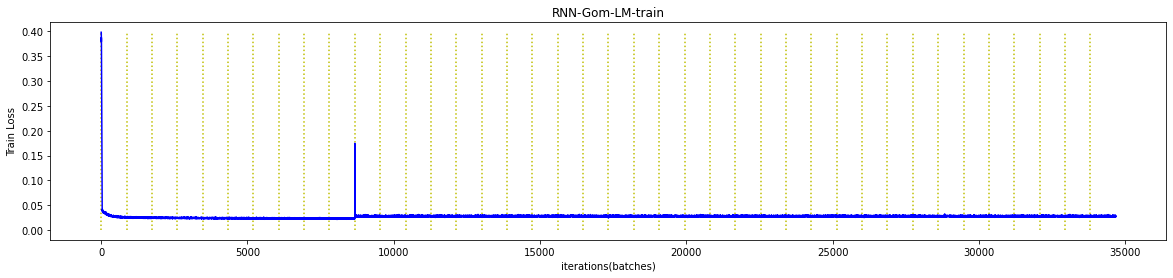

In [ ]:


data = np.genfromtxt('/content/trainLoss.csv', delimiter=',')
print("Epochs Recorded", data.shape[0])
values = np.resize(data,(-1,1) )
epoch_ends = np.arange(0, len(values), data.shape[1])
L_color = 'b'
X_lbl = "iterations(batches)"
Y_lbl = "Train Loss"


plot_array(array = values,vpoints = epoch_ends[0:], 
           x_label= X_lbl, y_label=Y_lbl, title=plot_title + "train", lcolor = L_color,
           figsize=(20,4), plot_from_x_index=0, x_scale_factor=1, sparsity = 1, 
           y_lim=None, x_lim=None)

## Validation Loss & Accuracy

In [ ]:
def plot_validation(loss_array, acc_array = None,  x_label="epochs", 
                    y1_label="VALIDATION Loss",y2_label="VALIDATION Accuracy", 
                    title='',  figsize=None, 
                    x_scale_factor=1, 
                    y_lim=None, x_lim=None ):
        
    fig, axs = plt.subplots(2, figsize=figsize)
    x_val = np.arange(len(loss_array))*x_scale_factor
    y_loss = loss_array
    axs[0].plot(x_val, y_loss, 'r')
    if acc_array is not None:
        y_acc = acc_array
        axs[1].plot(x_val, y_acc, 'g')
        axs[1].set_ylim([0,0.60])

    fig.suptitle(title)
    plt.show()

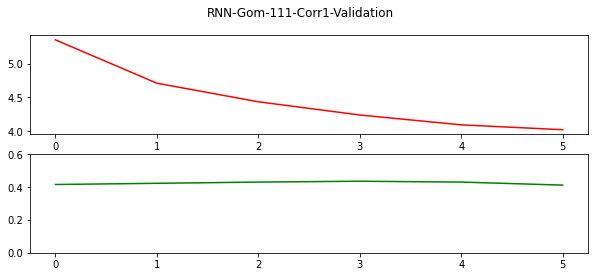

In [ ]:
data = np.genfromtxt('/content/valLoss.csv', delimiter=',')
loss_array = data[:,0]
acc_array = data[:,1]


plot_validation(loss_array = loss_array, acc_array = acc_array,
           title= plot_title + "Validation",
           figsize=(10,4), 
           y_lim=None, x_lim=None)